# Data analysis for Amazon


### Amit Stein



### First step, Import libraries and 2 dataset files

## Although we are working with two separate datasets, which were asked in two different parts, we will conduct the analysis in parallel to streamline the process. By handling similar steps at the same time, we can save time and ensure consistency in the analysis, allowing us to address any issues across both datasets more efficiently.

In [453]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


## EDA

### In the first stage of EDA, we will focus on understanding the dataset's structure, identifying missing data, and performing initial cleaning. This will help us spot any potential issues or patterns that may affect later analysis

### Dataset Description:
This dataset contains the Top  bestselling books on Amazon from 2009 to 2019. It includes a total of 550 book

In [381]:
url='https://raw.githubusercontent.com/steinamit/Amazon-Project/refs/heads/main/bestsellers%20with%20categories.csv'
Data1= pd.read_csv(url)
Data1

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


### Dataset Description:
This dataset contains information about popular movies available on Netflix.

In [382]:
url='https://raw.githubusercontent.com/steinamit/Amazon-Project/refs/heads/main/n_movies.csv'
Data2= pd.read_csv(url)
Data2

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


### As can be seen at this stage, both the stars and the genres, which are the focus of the second part of the question, contain multiple values.

### Data types

In [383]:
Data1.dtypes

,0
Name,object
Author,object
User Rating,float64
Reviews,int64
Price,int64
Year,int64
Genre,object


In [384]:
Data2.dtypes

,0
title,object
year,object
certificate,object
duration,object
genre,object
rating,float64
description,object
stars,object
votes,object


## Check if there are missing values


In [385]:
Data1.isnull().sum().sort_values(ascending=True)

,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [386]:
Data2.isnull().sum().sort_values(ascending=True)

,0
title,0
description,0
stars,0
genre,73
year,527
rating,1173
votes,1173
duration,2036
certificate,3453


In [387]:
Miss_cells = Data2.isnull().sum()
Miss_cells1 = Miss_cells.sum()
total_cells = np.product(Data2.shape)
percent_missing = (Miss_cells1/total_cells) *100
print(percent_missing)

9.412696818541953


### In the annual dataset, it can be observed that 10 percent of the data is missing.

### In order to handle with the missing values we replace it into 'NaN'

In [388]:
Data2_New = Data2.fillna('NaN')
Data2_New

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


### The reason I didn't use DROPNA is because it removes almost 50 percent of the values.

In [389]:
# Remove duplicates based on the "title" column
Data2_New1 = Data2_New.drop_duplicates(subset=['title'])
Data2_New1

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
8565,Alex,(2017–2019),NaN,47 min,"Action, Crime, Thriller",7.3,Add a Plot,"['Alain Darborg', '| ', ' Stars:', 'Dragomi...",33
8940,The Weekly with Wendy Mesley,(2018– ),NaN,NaN,"News, Reality-TV",NaN,How did Ontario's popular new Premier get so u...,"['Wendy Mesley, ', 'Billy Porter, ', 'Jacob To...",NaN
9520,The Drew Barrymore Show,(2020– ),TV-PG,44 min,Talk-Show,6.0,In the inaugural episode of The Drew Barrymore...,"['Adam Heydt', '| ', ' Stars:', 'Drew Barry...",19
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN


### Part 1 - Best Seller Analysis

### The first task is to advice the CEO in investing in "the bestseller of 2025."


In [390]:
genre_counts_Data1 = Data1['Genre'].value_counts()
genre_counts_Data1

,count
Genre,
Non Fiction,310
Fiction,240


### Statistically, it can be seen that over the years the audience chooses "Non-Fiction" more, so the probability in a situation of uncertainty that book from this domain will succeed. Therefore, filtering is done based on that.

In [391]:
filtered_data1 = Data1[Data1['Genre'] == 'Non Fiction']
filtered_data1

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
...,...,...,...,...,...,...,...
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [392]:
# Count the number of appearances for each author
author_counts = filtered_data1['Author'].value_counts()

# Display the top 10 authors with the most appearances
top_10_authors = author_counts.head(10)
top_10_authors

,count
Author,
Gary Chapman,11
American Psychological Association,10
Gallup,9
Rob Elliott,8
Bill O'Reilly,7
Stephen R. Covey,7
Don Miguel Ruiz,6
Sarah Young,6
The College Board,6


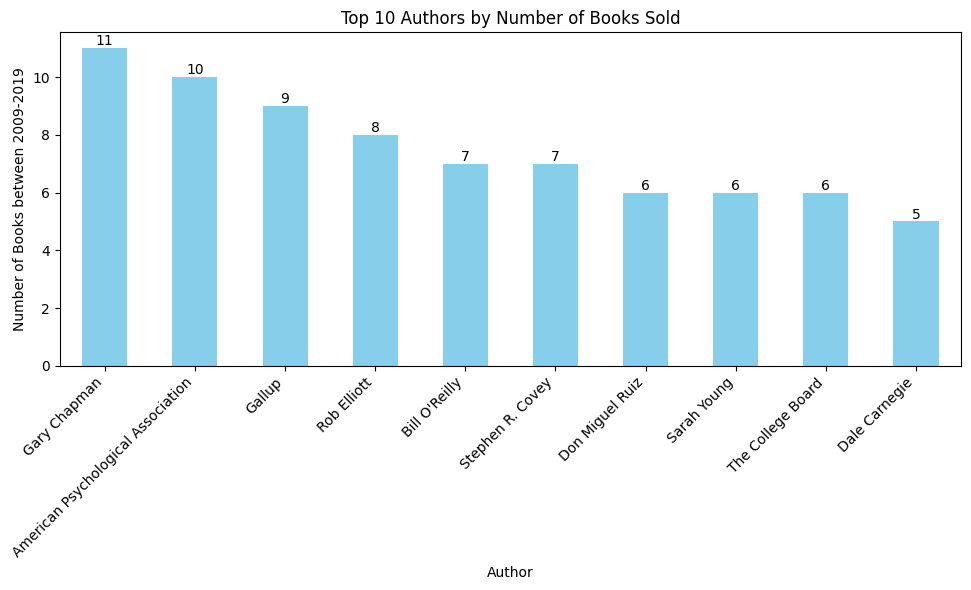

In [393]:
# Displaying the top 10 authors
top_10_authors = author_counts.head(10)

# Creating a bar plot with numbers above each bar
plt.figure(figsize=(10, 6))
ax = top_10_authors.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Top 10 Authors by Number of Books Sold')
plt.xlabel('Author')
plt.ylabel('Number of Books between 2009-2019')
plt.xticks(rotation=45, ha='right')

# Adding numbers above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='center')

# Displaying the plot
plt.tight_layout()
plt.show()

In [454]:


### Create a DataFrame containing only these authors
filtered_top_10 = filtered_data1[filtered_data1['Author'].isin(top_10_authors)]  # Filter the data

###  Calculate the average ratings for the top 10 authors
author_avg_ratings = filtered_top_10.groupby('Author')['User Rating'].mean()  # Compute average ratings per author

###  Create a DataFrame with the number of appearances and average rating
author_stats = pd.DataFrame({
    'author_count': author_counts.loc[top_10_authors],  # Number of appearances per author
    'avg_rating': author_avg_ratings.loc[top_10_authors]  # Average rating
})

# Calculating the total number of impressions
total_author_count = author_counts.sum()

# Calculating the normalization: (number_of_appearances * avg_rating) / total_appearances
author_stats['normalization'] = (author_stats['author_count'] * author_stats['avg_rating']) / total_author_count

# Sort by normalization in descending order
author_stats_sorted = author_stats.sort_values(by='normalization', ascending=False)

# Display the result
author_stats_sorted

,author_count,avg_rating,normalization
Author,,,
Gary Chapman,11,4.736364,0.168065
American Psychological Association,10,4.500000,0.145161
Rob Elliott,8,4.562500,0.117742
Gallup,9,4.000000,0.116129
Bill O'Reilly,7,4.642857,0.104839
Stephen R. Covey,7,4.642857,0.104839
Sarah Young,6,4.900000,0.094839
Don Miguel Ruiz,6,4.700000,0.090968
The College Board,6,4.383333,0.084839


<Figure size 1200x600 with 0 Axes>

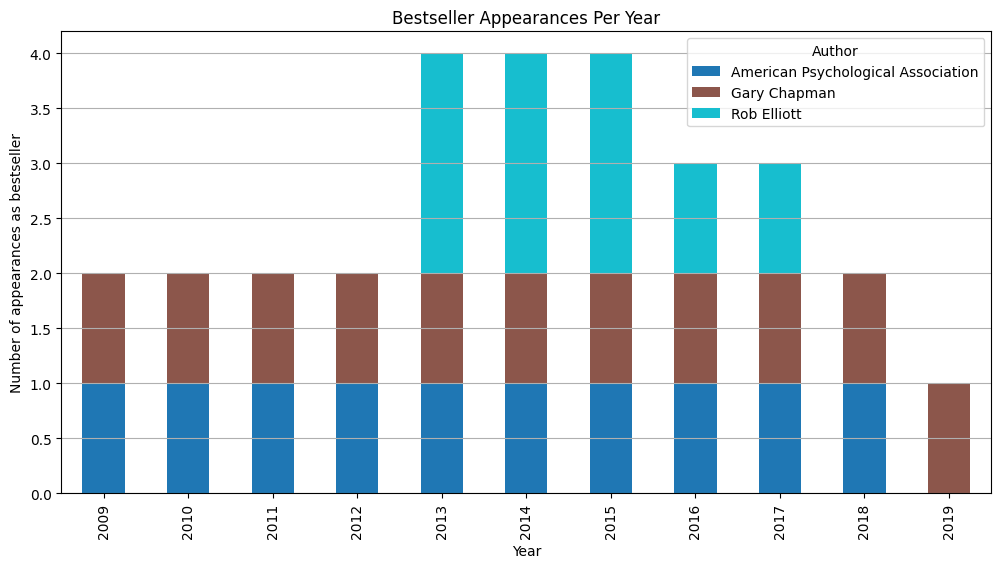

In [444]:
# List of authors of interest
authors_of_interest = ['Gary Chapman', 'American Psychological Association', 'Rob Elliott']

# Filtering the dataset to include only selected authors
df_filtered = Data1[Data1['Author'].isin(authors_of_interest)]

# Counting the number of appearances for each author per year
appearances_per_year = df_filtered.groupby(['Year', 'Author']).size().unstack(fill_value=0)

# Creating the bar chart
plt.figure(figsize=(12, 6))
appearances_per_year.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12, 6))

# Customizing the chart
plt.xlabel('Year')
plt.ylabel('Number of appearances as bestseller')
plt.title('Bestseller Appearances Per Year')
plt.legend(title='Author')
plt.grid(axis='y')

# Displaying the chart
plt.show()

## Task 2 - Collaboration from the movies

Since this is data that contains the most popular films, the assumption is that the audience responds positively to them. Ultimately, this figure indicates a consumer who pays for it, so it shows demand.
This figure already constitutes an initial screening done for us.
In Netflix's data, the  aspiration was to examine each genre and star in relation to the consumer rating. But in my opinion, it is not right to do this, because there are critical parameters that affect the film, both genres and stars have significant weight on the rating.

In [447]:
genres = Data2_New1['genre'].str.get_dummies(sep=', ')
genre_counts = genres.sum().sort_values(ascending=False)
genre_counts.head(5)

,0
Drama,3181
Comedy,2484
Action,1352
Documentary,1232
Crime,1091


<ipython-input-397-aae551da5c24>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df["Genre"], y=df["Count"], palette="viridis")


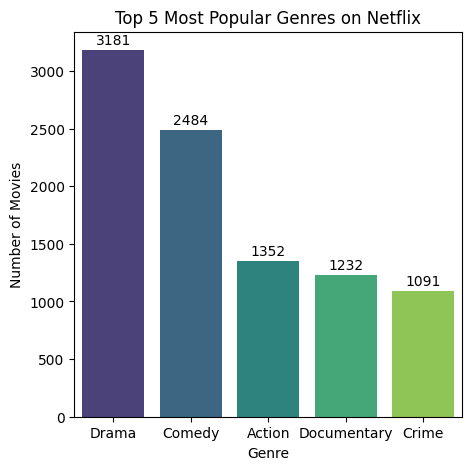

In [397]:
data = {
    "Genre": ["Drama", "Comedy", "Action", "Documentary", "Crime"],
    "Count": [3181, 2484, 1352, 1232, 1091]
}

df = pd.DataFrame(data)

# Creating the bar chart
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=df["Genre"], y=df["Count"], palette="viridis")

# Adding exact count values above each bar
for index, value in enumerate(df["Count"]):
    ax.text(index, value + 50, str(value), ha='center', fontsize=10)

# Setting labels and title
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top 5 Most Popular Genres on Netflix")

# Displaying the plot
plt.show()

In [398]:

# Split the 'stars' column into a list of individual actor names
all_stars = Data2_New1['stars'].dropna().str.split(', ').explode()

# Data cleaning: remove extra spaces and invalid characters
all_stars = all_stars.str.strip()
all_stars = all_stars[all_stars.str.len() > 1]
all_stars = all_stars[~all_stars.str.contains(r'[^a-zA-Z0-9\s\']')]

# Use Counter to count occurrences of each actor
stars_counts = Counter(all_stars)

# Create a DataFrame with the most popular actors
stars_df = pd.DataFrame(stars_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)
stars_df.head(5)





,Actor,Count
6141,'Jakob Eklund,18
10835,'Jan Suter',15
322,'Adam Sandler,15
5281,'Reza Rahadian,13
935,'Bruce Willis,13


<ipython-input-403-af50d0f73676>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_stars["Stars"], y=df_stars["Ratings"], palette="viridis")


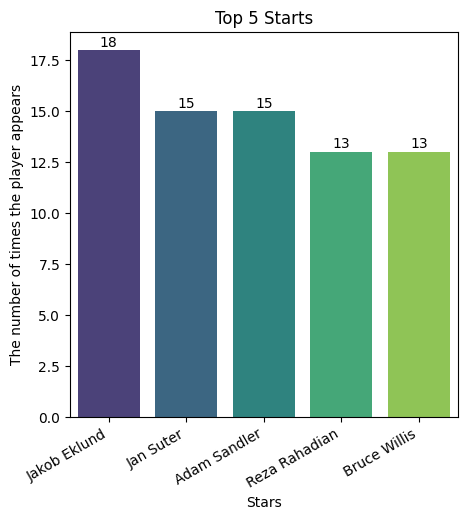

In [403]:
stars_data = {
    "Stars": ["Jakob Eklund", "Jan Suter", "Adam Sandler", "Reza Rahadian", "Bruce Willis"],
    "Ratings": [18, 15, 15, 13, 13]
}

df_stars = pd.DataFrame(stars_data)

# Creating the bar chart
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=df_stars["Stars"], y=df_stars["Ratings"], palette="viridis")

# Adding rating values above each bar
for index, value in enumerate(df_stars["Ratings"]):
    ax.text(index, value + 0.2, str(value), ha='center', fontsize=10)

# Labels and title
plt.xlabel("Stars")
plt.ylabel("The number of times the player appears")
plt.title("Top 5 Starts")

# Rotating x-axis labels for better readability
plt.xticks(rotation=30, ha="right")

# Displaying the plot
plt.show()

In [400]:

# Extract four-digit year values and convert to numeric
Data2_New1['year'] = Data2_New1['year'].astype(str).str.extract('(\d{4})')
Data2_New1['year'] = pd.to_numeric(Data2_New1['year'], errors='coerce')

# Print the first 10 non-null values from the 'year' column
print(Data2_New1[['year']].dropna().head(10))


     year
0  2018.0
1  2016.0
2  2015.0
3  2022.0
4  2022.0
5  2022.0
6  2013.0
7  2008.0
8  2022.0
9  2022.0


<ipython-input-400-1e59935b9339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2_New1['year'] = Data2_New1['year'].astype(str).str.extract('(\d{4})')
<ipython-input-400-1e59935b9339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2_New1['year'] = pd.to_numeric(Data2_New1['year'], errors='coerce')


In [425]:
# Convert 'year' and 'votes' to numeric values
Data2_New1['year'] = pd.to_numeric(Data2_New1['year'], errors='coerce')
Data2_New1['votes'] = pd.to_numeric(Data2_New1['votes'], errors='coerce')

# Filter values between 2020 and 2025 and keep rows with more than 970 votes
df_sorted = Data2_New1[
    (Data2_New1['year'] >= 2020) &
    (Data2_New1['year'] <= 2025) &
    (Data2_New1['votes'] > 970)
].sort_values(by='rating', ascending=False)

# Display the top 3 rows
df_sorted.head(3)

<ipython-input-425-41436bc628eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2_New1['year'] = pd.to_numeric(Data2_New1['year'], errors='coerce')
<ipython-input-425-41436bc628eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2_New1['votes'] = pd.to_numeric(Data2_New1['votes'], errors='coerce')


,title,year,certificate,duration,genre,rating,description,stars,votes
6639,"Yours Sincerely, Kanan Gill",2020.0,TV-MA,72 min,Comedy,7.1,Revisiting life goals set in a letter written ...,"['Neville Shah', '| ', ' Star:', 'Kanan Gill']",985.0
4523,The Last Word,2020.0,TV-MA,40 min,"Comedy, Drama",7.0,While still working through her husband's rece...,"['Anke Engelke, ', 'Thorsten Merten, ', 'Johan...",979.0
4863,Blood Brothers: Malcolm X & Muhammad Ali,2021.0,PG-13,95 min,"Documentary, Biography, History",6.9,"From a chance meeting to a tragic fallout, Mal...","['Marcus A. Clarke', '| ', ' Stars:', 'Ilya...",986.0
